Model Evaluation and Hyperparameter Tuning on Titanic Dataset

Step 1: Import Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

Step 2: Load and Analyze Titanic Dataset

In [3]:
# Load Titanic dataset
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


Step 3: Data preprocessing

In [6]:
# Drop irrelevant columns
df.drop(['deck', 'embark_town', 'alive', 'class', 'who'], axis=1, inplace=True)

# Drop rows with missing values in critical columns
df.dropna(subset=['embarked', 'age', 'fare'], inplace=True)

# Encode categorical variables
df['sex'] = df['sex'].map({'male': 0, 'female': 1})
df['embarked'] = df['embarked'].map({'S': 0, 'C': 1, 'Q': 2})
df['adult_male'] = df['adult_male'].astype(int)
df['alone'] = df['alone'].astype(int)

# Define features and target
X = df.drop(['survived'], axis=1)
y = df['survived']

In [7]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,adult_male,alone
0,0,3,0,22.0,1,0,7.2500,0,1,0
1,1,1,1,38.0,1,0,71.2833,1,0,0
2,1,3,1,26.0,0,0,7.9250,0,0,1
3,1,1,1,35.0,1,0,53.1000,0,0,0
4,0,3,0,35.0,0,0,8.0500,0,1,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   survived    712 non-null    int64  
 1   pclass      712 non-null    int64  
 2   sex         712 non-null    int64  
 3   age         712 non-null    float64
 4   sibsp       712 non-null    int64  
 5   parch       712 non-null    int64  
 6   fare        712 non-null    float64
 7   embarked    712 non-null    int64  
 8   adult_male  712 non-null    int32  
 9   alone       712 non-null    int32  
dtypes: float64(2), int32(2), int64(6)
memory usage: 55.6 KB


Step 4: Train-Test Split and Scaling

In [9]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Step 5: Train and Evaluate Baseline Models

In [10]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred)
    })

results_df = pd.DataFrame(results)
print(results_df.sort_values(by='F1 Score', ascending=False))

                    Model  Accuracy  Precision    Recall  F1 Score
0     Logistic Regression  0.804196   0.807018  0.730159  0.766667
2  Support Vector Machine  0.804196   0.807018  0.730159  0.766667
3     K-Nearest Neighbors  0.797203   0.814815  0.698413  0.752137
1           Random Forest  0.769231   0.758621  0.698413  0.727273


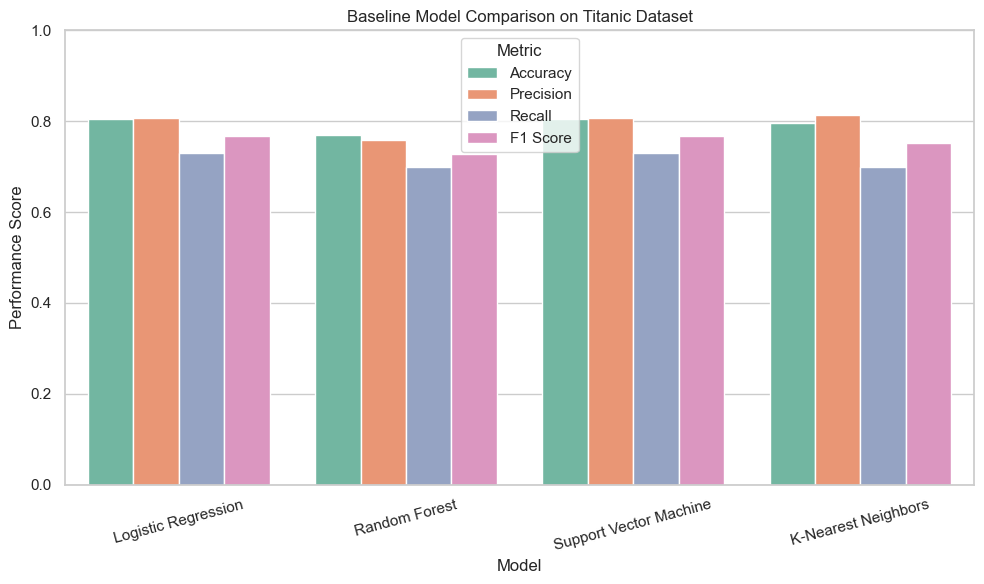

In [11]:
#Visualize results for comparision
import matplotlib.pyplot as plt
import seaborn as sns

# Convert DataFrame to long format for easier plotting
results_long = results_df.melt(id_vars='Model', var_name='Metric', value_name='Score')

sns.set(style='whitegrid')

# Plot grouped bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=results_long, x='Model', y='Score', hue='Metric', palette='Set2')

plt.title('Baseline Model Comparison on Titanic Dataset')
plt.ylim(0, 1)
plt.ylabel('Performance Score')
plt.xticks(rotation=15)
plt.legend(title='Metric')
plt.tight_layout()
plt.show()

Step 6: Hyperparameter Tuning

In [12]:
#GridSearchCV for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_rf = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid_rf,
    cv=5,
    scoring='f1',
    verbose=1,
    n_jobs=-1
)
grid_rf.fit(X_train, y_train)

print("Best RF Params:", grid_rf.best_params_)
print("Best RF F1 Score:", grid_rf.best_score_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best RF Params: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 100}
Best RF F1 Score: 0.7590966351042462


In [13]:
#RandomizedSearchCV for SVM
param_dist_svc = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

random_svc = RandomizedSearchCV(
    estimator=SVC(),
    param_distributions=param_dist_svc,
    n_iter=10,
    cv=5,
    scoring='f1',
    verbose=1,
    random_state=42,
    n_jobs=-1
)
random_svc.fit(X_train, y_train)

print("Best SVM Params:", random_svc.best_params_)
print("Best SVM F1 Score:", random_svc.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best SVM Params: {'kernel': 'linear', 'gamma': 'scale', 'C': 0.1}
Best SVM F1 Score: 0.7595794288759604


Step 7: Final Evaluation of Tuned Models

In [14]:
# Get best models
best_rf = grid_rf.best_estimator_
best_svc = random_svc.best_estimator_

# Predictions
y_pred_rf = best_rf.predict(X_test)
y_pred_svc = best_svc.predict(X_test)

# Create evaluation table
evaluation = pd.DataFrame({
    'Model': ['Tuned Random Forest', 'Tuned SVM'],
    'Accuracy': [accuracy_score(y_test, y_pred_rf), accuracy_score(y_test, y_pred_svc)],
    'Precision': [precision_score(y_test, y_pred_rf), precision_score(y_test, y_pred_svc)],
    'Recall': [recall_score(y_test, y_pred_rf), recall_score(y_test, y_pred_svc)],
    'F1 Score': [f1_score(y_test, y_pred_rf), f1_score(y_test, y_pred_svc)]
})
evaluation.set_index('Model', inplace=True)
print(evaluation)

                     Accuracy  Precision    Recall  F1 Score
Model                                                       
Tuned Random Forest  0.776224   0.781818  0.682540  0.728814
Tuned SVM            0.804196   0.796610  0.746032  0.770492


Step 8: Visualization – Performance Comparison

<Figure size 1000x600 with 0 Axes>

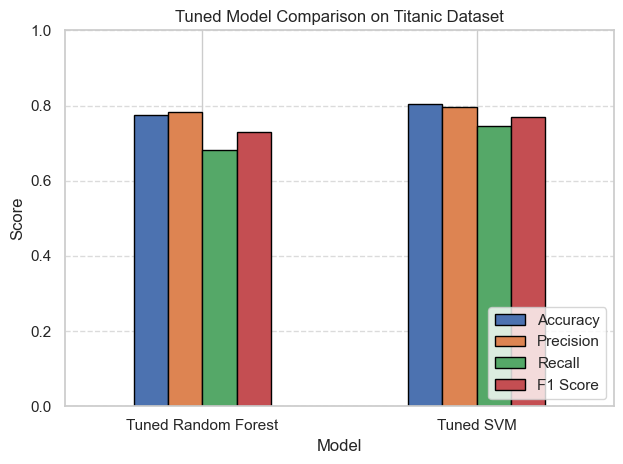

In [15]:
# Bar plot to compare tuned models
plt.figure(figsize=(10, 6))
evaluation.plot(kind='bar', edgecolor='black')
plt.title('Tuned Model Comparison on Titanic Dataset')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

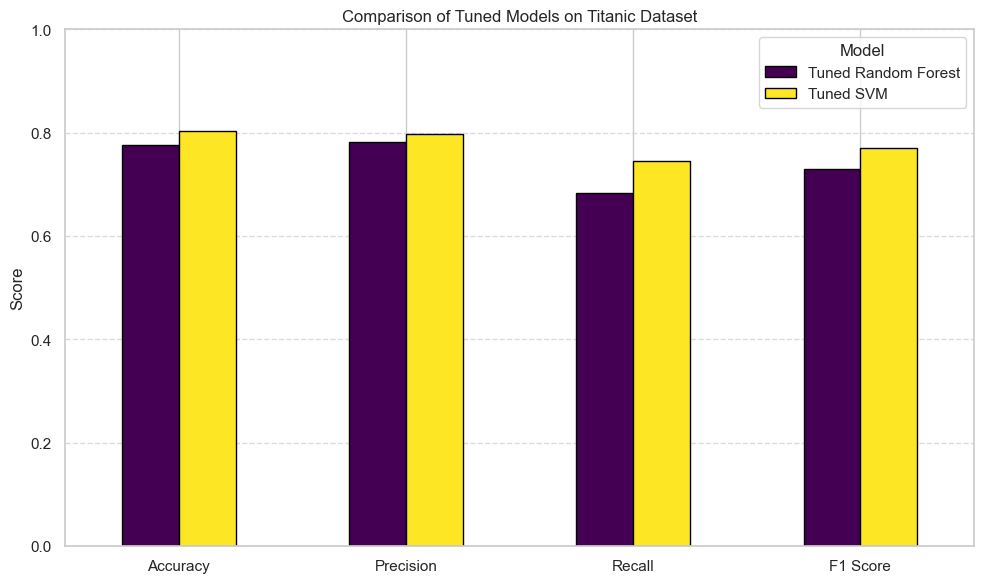

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Reset plot style
sns.set(style="whitegrid")

# Transpose for easier plotting
evaluation_plot = evaluation.T

# Bar plot
plt.figure(figsize=(10, 6))
evaluation_plot.plot(kind='bar', figsize=(10, 6), colormap='viridis', edgecolor='black')

plt.title('Comparison of Tuned Models on Titanic Dataset')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Model')
plt.tight_layout()
plt.show()

Confusion Matrix for Tuned Random Forest & Tuned SVM

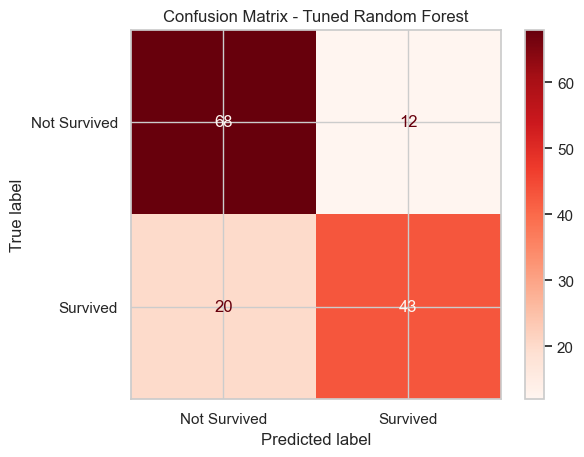

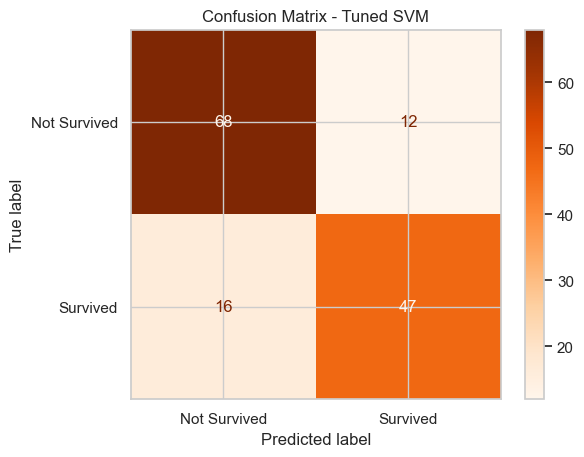

In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=["Not Survived", "Survived"])
disp_rf.plot(cmap='Reds')
plt.title("Confusion Matrix - Tuned Random Forest")
plt.show()

# Confusion matrix for SVM
cm_svc = confusion_matrix(y_test, y_pred_svc)
disp_svc = ConfusionMatrixDisplay(confusion_matrix=cm_svc, display_labels=["Not Survived", "Survived"])
disp_svc.plot(cmap='Oranges')
plt.title("Confusion Matrix - Tuned SVM")
plt.show()

ROC Curve & AUC Score

This shows the trade-off between True Positive Rate and False Positive Rate.

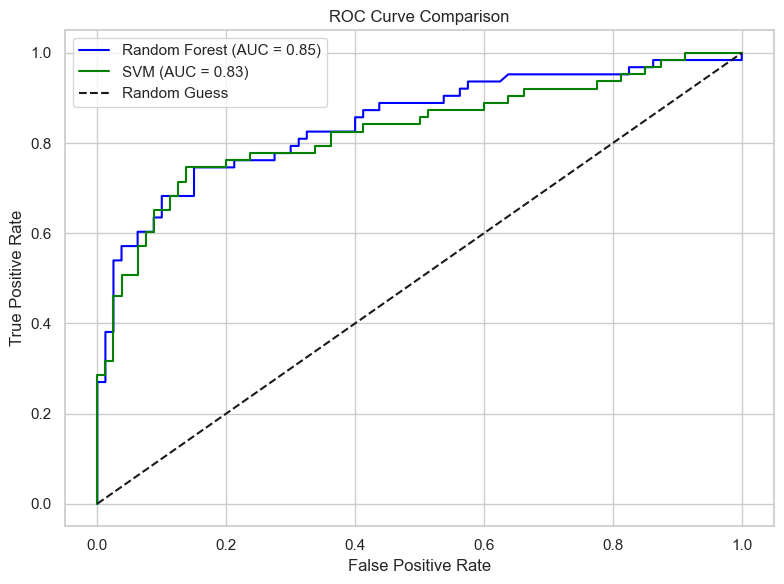

In [18]:
from sklearn.metrics import roc_curve, auc

# Get probabilities
y_scores_rf = best_rf.predict_proba(X_test)[:, 1]
y_scores_svc = best_svc.decision_function(X_test)

# ROC curves
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_scores_rf)
fpr_svc, tpr_svc, _ = roc_curve(y_test, y_scores_svc)

# AUC Scores
auc_rf = auc(fpr_rf, tpr_rf)
auc_svc = auc(fpr_svc, tpr_svc)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})', color='blue')
plt.plot(fpr_svc, tpr_svc, label=f'SVM (AUC = {auc_svc:.2f})', color='green')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Tuned SVM is the Best-Performing Model

1. Higher precision , higher recall hence overall higher f1_score, indicating the best balance between precision and recall.
2. The confusion matrices show classification effectiveness — true positives, false positives, etc.
3. The ROC curve and AUC score give a visual + numerical measure of classifier quality. A model with AUC closer to 1 is better.

Overall, SVM outperforms Random Forest on all key metrics. So, we use Tuned SVM as the final model for predicting survival on the Titanic dataset. It offers the best overall performance for balanced classification.